In [ ]:
# 런타임 -> 런타임 유형 변경 -> GPU

In [ ]:
import numpy as np
np.random.seed(10) # 가중치 랜덤 수 고정!
import matplotlib.pyplot as plt # 손글씨

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 데이터 준비 완료

In [ ]:
print(x_train.shape, y_train.shape) # 60000개의 이미지가 있다

(60000, 28, 28) (60000,)


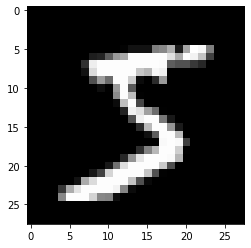

In [ ]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [ ]:
print(y_train[0]) # 정답

5


In [ ]:
# 전처리 필요
x_train = x_train.astype('float32')/255. # 정규화
x_test = x_test.astype('float32')/255. 
y_train = tf.keras.utils.to_categorical(y_train, 10) # one-hot 인코딩
y_test = tf.keras.utils.to_categorical(y_test, 10) # 10은 정답 가짓수

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 이제, 모델 만들기
model = tf.keras.models.Sequential()

In [ ]:
# 입력 레이어
layer1 = tf.keras.layers.Flatten(input_shape=(28,28)) # 쭉 펴 주기

In [ ]:
# 히든 레이어
layer2 = tf.keras.layers.Dense(90, activation='relu') # (노드 개수, 활성 함수)

In [ ]:
# 최종 레이어
layer3 = tf.keras.layers.Dense(10, activation='softmax') # 확률 출력

In [ ]:
model.add(layer1)
model.add(layer2)
model.add(layer3)

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 90)                70650     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                910       
Total params: 71,560
Trainable params: 71,560
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=25, batch_size=100)

Epoch 1/25
600/600 [==============================] - 2s 2ms/step - loss: 1.5424 - accuracy: 0.5795
Epoch 2/25
600/600 [==============================] - 1s 2ms/step - loss: 0.5547 - accuracy: 0.8592
Epoch 3/25
600/600 [==============================] - 1s 2ms/step - loss: 0.4274 - accuracy: 0.8840
Epoch 4/25
600/600 [==============================] - 1s 2ms/step - loss: 0.3752 - accuracy: 0.8980
Epoch 5/25
600/600 [==============================] - 1s 2ms/step - loss: 0.3512 - accuracy: 0.9011
Epoch 6/25
600/600 [==============================] - 1s 2ms/step - loss: 0.3312 - accuracy: 0.9071
Epoch 7/25
600/600 [==============================] - 1s 2ms/step - loss: 0.3186 - accuracy: 0.9095
Epoch 8/25
600/600 [==============================] - 1s 2ms/step - loss: 0.3079 - accuracy: 0.9100
Epoch 9/25
600/600 [==============================] - 1s 2ms/step - loss: 0.2918 - accuracy: 0.9178
Epoch 10/25
600/600 [==============================] - 1s 2ms/step - loss: 0.2892 - accuracy: 0.9172

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1956 - accuracy: 0.9432


[0.1956377625465393, 0.9431999921798706]

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/DL_Seminar'

/content/drive/MyDrive/Colab Notebooks/DL_Seminar


In [ ]:
from PIL import Image

In [ ]:
img = Image.open('2.png')
img = img.resize((28,28))
img = img.convert('L')
img = np.array(img)

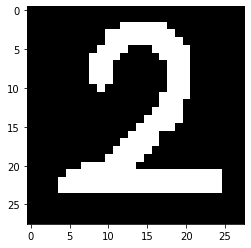

In [ ]:
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
img = img.astype('float32')/255.

In [ ]:
np.argmax(model.predict(img.reshape(1,28,28))) # 1개짜리 이미지

2

In [ ]:
# 과제 (mnist -> fashion_mnist)
# 성능 높이려면 layer를 늘리거나 lr을 수정하거나 새 layer를 넣거나

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(x_trainf,y_trainf), (x_testf,y_testf) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_trainf.shape, y_trainf.shape)

(60000, 28, 28) (60000,)


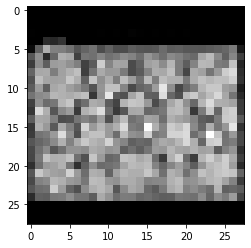

In [ ]:
plt.imshow(x_trainf[23], cmap='gray')
plt.show()

In [ ]:
print(y_trainf[23])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
x_trainf = x_trainf.astype('float32')/255.
x_testf = x_testf.astype('float32')/255. 
y_trainf = tf.keras.utils.to_categorical(y_trainf, 10)
y_testf = tf.keras.utils.to_categorical(y_testf, 10)

In [ ]:
modelf = tf.keras.models.Sequential()

In [ ]:
layer1f = tf.keras.layers.Flatten(input_shape=(28,28))
layer2f = tf.keras.layers.Dense(90, activation='relu')
layer3f = tf.keras.layers.Dense(90, activation='relu')
layer4f = tf.keras.layers.Dense(10, activation='softmax')

In [ ]:
modelf.add(layer1f)
modelf.add(layer2f)
modelf.add(layer3f)
modelf.add(layer4f)

In [ ]:
sgdf = tf.keras.optimizers.SGD(learning_rate=0.005)

In [ ]:
modelf.compile(optimizer=sgdf, loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
modelf.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 90)                70650     
_________________________________________________________________
dense_12 (Dense)             (None, 90)                8190      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                910       
Total params: 79,750
Trainable params: 79,750
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyf = modelf.fit(x_trainf, y_trainf, epochs=40, batch_size=100)

Epoch 1/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3082 - accuracy: 0.8908
Epoch 2/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3076 - accuracy: 0.8913
Epoch 3/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3065 - accuracy: 0.8916
Epoch 4/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3051 - accuracy: 0.8923
Epoch 5/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3040 - accuracy: 0.8926
Epoch 6/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3035 - accuracy: 0.8926
Epoch 7/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3020 - accuracy: 0.8933
Epoch 8/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3008 - accuracy: 0.8931
Epoch 9/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3000 - accuracy: 0.8942
Epoch 10/40
600/600 [==============================] - 1s 2ms/step - loss: 0.2989 - accuracy: 0.8941

In [ ]:
modelf.evaluate(x_testf, y_testf)

313/313 [==============================] - 1s 2ms/step - loss: 0.3475 - accuracy: 0.8746


[0.3475266396999359, 0.8745999932289124]

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/DL_Seminar'

/content/drive/MyDrive/Colab Notebooks/DL_Seminar


In [ ]:
from PIL import Image

In [ ]:
imgf = Image.open('shoe.jpg')
imgf = imgf.resize((28,28))
imgf = imgf.convert('L')
imgf = np.array(imgf)

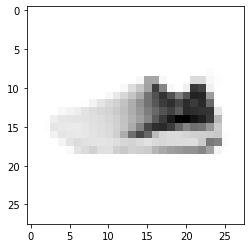

In [ ]:
plt.imshow(imgf, cmap='gray')
plt.show()

In [ ]:
imgf = imgf.astype('float32')/255.

In [ ]:
np.argmax(modelf.predict(imgf.reshape(1,28,28)))

8